<a href="https://colab.research.google.com/github/Abhijeet314/EmailSpamClassifier/blob/main/SMSSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['target', 'text']

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# check for null and duplicated values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
# there are duplicates so we remove them
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
# checking how many ham and spam values are there
df['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
# data is imbalanced as ham are many and spam are less so here precision will matter more than accuracy

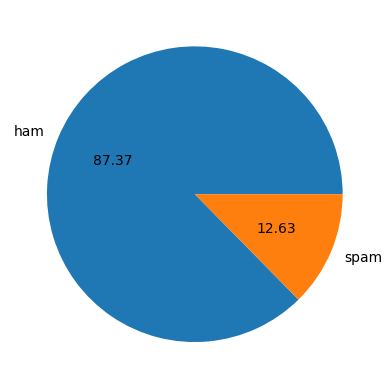

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
# try to verify how many number of characters words and sentences are present
import nltk

In [ ]:
# no of characters
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# install punkt for using word_tokenize and sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# for calculating no of words we can use a function known as word_tokenize from nltk
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(1)

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [ ]:
df[df['target'] == 0]['num_characters'].describe()

,num_characters
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [ ]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# we can see num_character and num_words and num_sent are more in ham compared to spam

<Axes: xlabel='num_characters', ylabel='Count'>

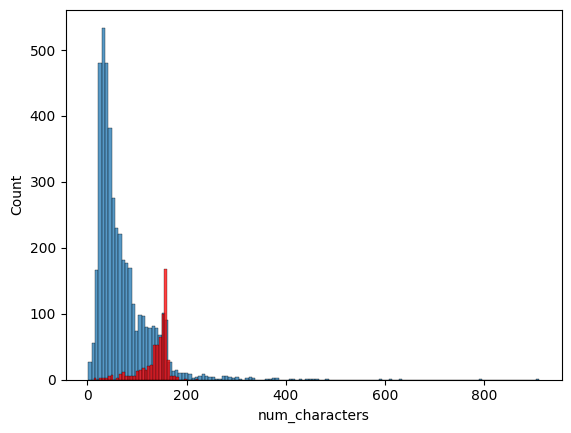

In [ ]:
import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='r')

<Axes: xlabel='num_words', ylabel='Count'>

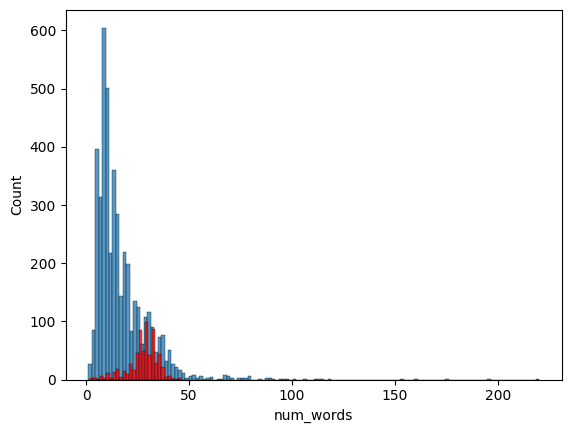

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='r')

<Axes: xlabel='num_sent', ylabel='Count'>

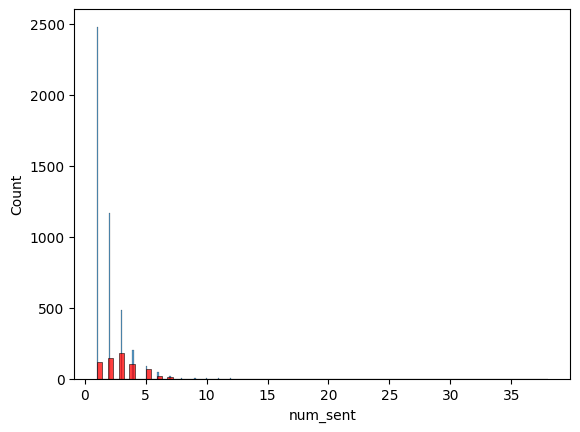

In [ ]:
sns.histplot(df[df['target'] == 0]['num_sent'])
sns.histplot(df[df['target'] == 1]['num_sent'], color='r')

In [ ]:
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
ps = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Preprocessing

Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [ ]:
def transform_text(text):
  text = text.lower()
  # tokenization
  text = nltk.word_tokenize(text)

  y = []
  # removing special characters
  for i in text:
    if i.isalnum():
      y.append(i)

  # remove stop words
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # stemming
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

a = 'Hi everyone'
print(transform_text(a))

SyntaxError: invalid syntax (<ipython-input-131-76d6279311f1>, line 30)

In [ ]:
hndf['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:

df.head(2)

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [ ]:
# we will create a wordCloud from which we can know the most frequent words coming

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

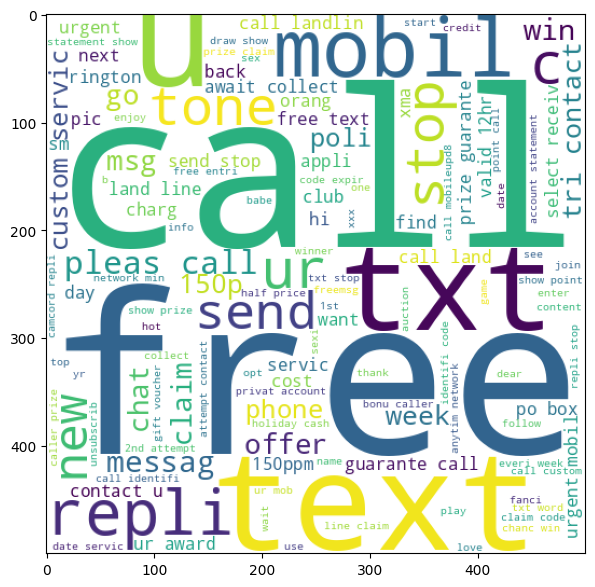

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

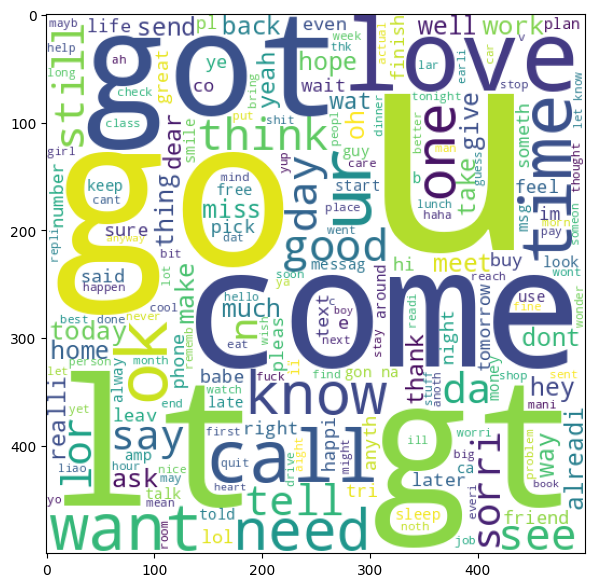

In [ ]:
plt.figure(figsize=(12,7))
plt.imshow(ham_wc)

In [ ]:
# now we will take out most common or frequent 30 words used in spam and ham message just to know more abuot data
spam_corpus = []
for i in df[df['target'] == 1]['transformed_text'].tolist():
  for word in i.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

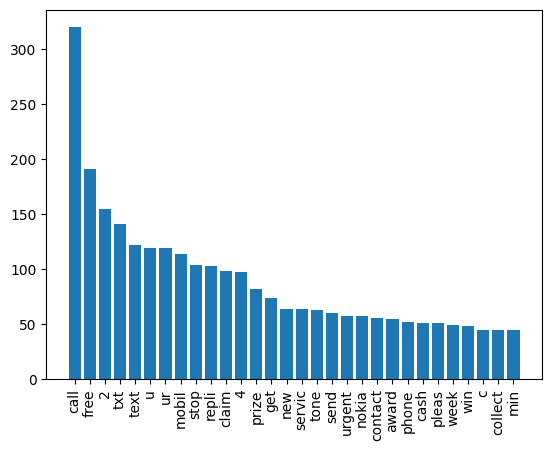

In [ ]:
from collections import Counter

plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for i in df[df['target'] == 0]['transformed_text'].tolist():
  for word in i.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

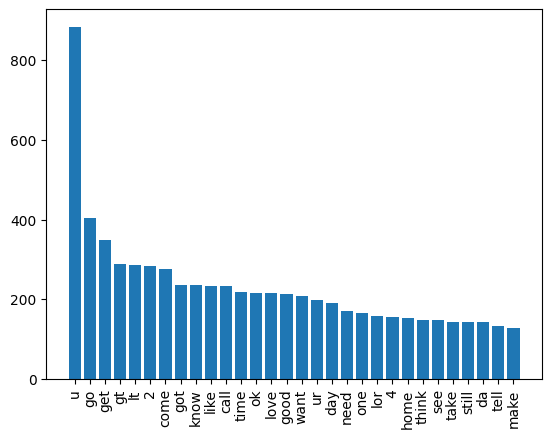

In [ ]:
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# now applying algorithms we accutaly know that on textual data naive Bayes works preety good so we start with that
# then we try to apply different classification algorithms

In [ ]:
# so we will use method of bag of words where the most used elements are chosen and then we create columns
# of most chosen elements and then we check for each row how many no of words of chosen ones are present and we write their number
# so this create a vector
# dont have to do it manually have countVectorizer and TfidF vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
gn = GaussianNB()
mn = MultinomialNB()
bn = BernoulliNB()

gn.fit(X_train, y_train)
mn.fit(X_train, y_train)
bn.fit(X_train, y_train)

BernoulliNB()

In [ ]:
gn_pred = gn.predict(X_test)

In [ ]:
mn_pred = mn.predict(X_test)

In [ ]:
bn_pred = bn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, gn_pred))
print(accuracy_score(y_test, bn_pred))
print(accuracy_score(y_test, mn_pred))

0.8694390715667312
0.9835589941972921
0.9709864603481625


In [ ]:
print(precision_score(y_test, gn_pred))
print(precision_score(y_test, bn_pred))
print(precision_score(y_test, mn_pred))

0.5068493150684932
0.991869918699187
1.0


In [ ]:
# tfid with mnb gives best result as of accuracy is 97 but precision is 1 that matters as data is imbalanced

In [ ]:
# lets try other algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
# lets try scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mv = MinMaxScaler()
X_train_trf = mv.fit_transform(X_train)
X_test_trf = mv.fit_transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [ ]:
mn.fit(X_train_trf, y_train)
y_predic = mn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test, y_predic)

0.9787234042553191

In [ ]:
precision_score(y_test, y_predic)

0.9393939393939394

In [ ]:
import pickle
pickle.dump(tf, open("tf.pkl", 'wb'))
pickle.dump(mn, open("model.pkl", 'wb'))